## Finger demo
Example of a fit to two fixed pcm-models
The example of the models and data is taken from Ejaz et al. (2015).
Nature Neuroscience: "Hand usage predicts.." 
We fit the follwoing 5 models 
* null: G=np.eye, all finger patterns are equally far away from each other, Note that in many situations the no-information null model, G = np.zeros, maybe , more appropriate   
* Muscle: Fixed model with G = covariance of muscle activities 
* Natural: Fixed model with G = covariance of natural movements
* Muscle+nat: Combination model of muscle and natural covariance 
* Noiseceil: Noise ceiling model 

In [1]:
# Import necessary libraries
import PcmPy as pcm
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the activity Data, condition vector, partition vector, 
# and model matrices for Muscle (0) and Natural stats Models (M)
f = open('data_demo_finger7T.p','rb')
Data,cond_vec,part_vec,modelM = pickle.load(f)
f.close()

In [3]:
# Build the datasets from the Data and condition vectors 
Y = list()
for i in range(len(Data)):
    obs_des = {'cond_vec': cond_vec[i],
               'part_vec': part_vec[i]}
    Y.append(pcm.Dataset(Data[i],obs_descriptors = obs_des))

In [4]:
# Estimate and plot the second moment matrices across all data sets
N=len(Y)
G_hat = np.zeros((N,5,5))
for i in range(N):
    G_hat[i,:,:],_ = pcm.util.est_G_crossval(Y[i].measurements,
                            Y[i].obs_descriptors['cond_vec'],
                            Y[i].obs_descriptors['part_vec'],
                            X=pcm.matrix.indicator(Y[i].obs_descriptors['part_vec']))

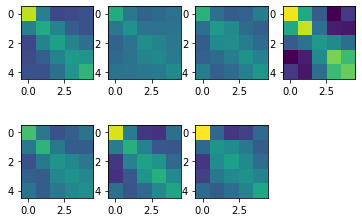

In [5]:
# show all second moment matrices
vmin = G_hat.min()
vmax = G_hat.max()
for i in range(N):
    plt.subplot(2,4,i+1)
    plt.imshow(G_hat[i,:,:],vmin=vmin,vmax=vmax)

In [6]:
# Build models from the second momement matrices
M = []
M.append(pcm.ModelFixed('null',np.eye(5)))
M.append(pcm.ModelFixed('muscle',modelM[0]))
M.append(pcm.ModelFixed('natural',modelM[1]))
M.append(pcm.ModelComponent('muscle+nat',[modelM[0],modelM[1]]))
M.append(pcm.ModelFree('ceil',5)) # Noise ceiling model 

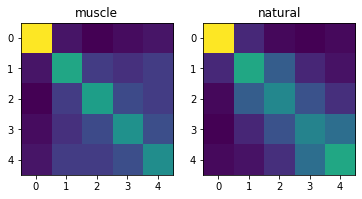

In [7]:
# Show the two underlying second moment matrices, these are pretty similar
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(M[i+1].G)
    plt.title(M[i+1].name)

In [8]:
# Fit the model in to the full group, using a individual scaling parameter for each 
T_gr, theta = pcm.inference.fit_model_group(Y, M, fit_scale=True)


Fitting model 0
Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4


In [9]:
# crossvalidated likelihood is the same as the group fit for all 
# except the component and noise ceiling model
T_cv, theta_cv = pcm.inference.fit_model_group_crossval(Y, M, fit_scale=True)


Fitting model 0
Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4


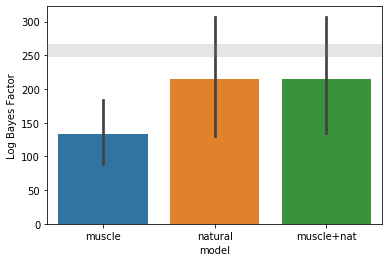

In [10]:
ax = pcm.vis.model_plot(T_cv.likelihood,null_model = 'null',noise_ceiling= 'ceil',upper_ceiling = T_gr.likelihood['ceil'])


In [10]:
T_gr

variable    likelihood                                            \
model             null        muscle       natural    muscle+nat   
0        -42231.412711 -41966.470799 -41786.672956 -41786.672945   
1        -34965.171104 -34923.791342 -34915.406608 -34915.406214   
2        -34767.538097 -34679.107626 -34632.643241 -34632.643003   
3        -45697.970627 -45609.052395 -45448.518276 -45448.518460   
4        -31993.363827 -31866.288313 -31806.982719 -31806.982541   
5        -41817.234010 -41632.061473 -41543.438786 -41543.438798   
6        -50336.142592 -50201.799362 -50173.300358 -50173.300312   

variable                   noise                                           \
model             ceil      null    muscle   natural muscle+nat      ceil   
0        -41729.668880  0.875853  0.871286  0.868482   0.868482  0.874193   
1        -34908.744214  1.070401  1.067480  1.069075   1.069075  1.073005   
2        -34607.535979  1.026408  1.021219  1.019122   1.019123  1.022025   
3        -45344.074725  1.480699  1.479592  1.474026   1.474026  1.479776   
4        -31738.538552  0.808482  0.805621  0.805774   0.805774  0.808484   
5        -41456.459249  1.035696  1.031827  1.031649   1.031649  1.036328   
6        -50157.026613  1.479001  1.472401  1.474430   1.474430  1.481835   

variable     scale                                          iterations         \
model         null    muscle   natural muscle+nat      ceil       null muscle   
0         0.109319  0.750145  0.786771   1.209841  1.135093         13      4   
1         0.045008  0.324407  0.322917   0.496560  0.436238         13      4   
2         0.059863  0.435483  0.463987   0.713478  0.664386         13      4   
3         0.173031  1.193770  1.235628   1.900067  1.758033         13      4   
4         0.073935  0.516338  0.532421   0.818724  0.764043         13      4   
5         0.116696  0.801114  0.828773   1.274435  1.185213         13      4   
6         0.101477  0.714043  0.723969   1.113272  1.002238         13      4   

variable                          
model    natural muscle+nat ceil  
0              4          6   26  
1              4          6   26  
2              4          6   26  
3              4          6   26  
4              4          6   26  
5              4          6   26  
6              4          6   26

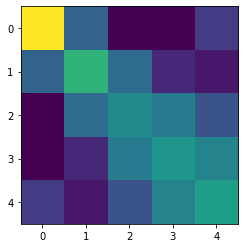

In [23]:
G,_ = M[4].predict(theta[4][:M[4].n_param])
plt.imshow(G)